<a href="https://colab.research.google.com/github/KiyongAhn/rep01/blob/master/15%EB%B2%88%EC%97%B0%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
'''
matplolib inline 명령어를 통해서
matplot으로 그리는 플롯들을 주피터 노트북 내에서 볼 수 있게 해준다.
포맷을 retina로 바꾸면 그래프의 화질이 훨씬 좋아진다.
'''
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

'''
라이브러리들을 불러오자.
'''
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import random as rd

from sklearn.metrics import accuracy_score

##데이터 불러오고 전처리 해보자

In [0]:
(train_x, train_y), (test_x, test_y) = tf.keras.datasets.mnist.load_data()

In [0]:
print(train_x.shape, train_y.shape, test_x.shape, test_y.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


id = 3551
다음 그림은 숫자 4 입니다.


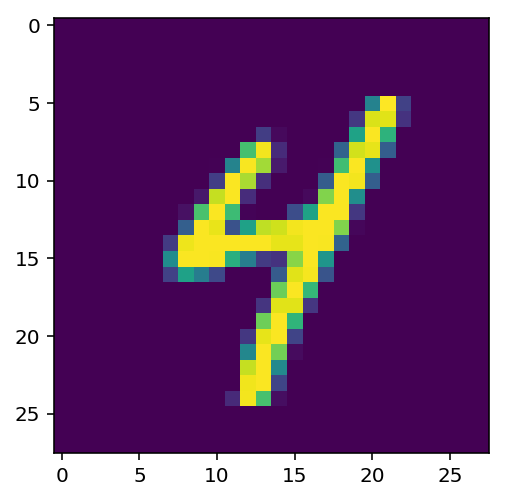

In [0]:
'''
Ctrl+Enter를 이용하여
반복 실행 해보자!
'''

id = rd.randrange(0,10000)

print('id = {}'.format(id))
print('다음 그림은 숫자 {} 입니다.'.format(test_y[id]))
plt.imshow(test_x[id])
plt.show()

In [0]:
train_x = train_x.reshape([train_x.shape[0],-1])
test_x  = test_x.reshape([test_x.shape[0],-1])

print(train_x.shape, test_x.shape)

(60000, 784) (10000, 784)


In [0]:
train_xx = train_x.reshape([60000,-1])
train_x.shape

(60000, 28, 28)

(60000, 784)

In [0]:
max_num = train_x.max()

train_x = train_x/max_num
test_x = test_x/max_num

print('max :', train_x.max(),'  min :', train_x.min())

max : 1.0   min : 0.0


In [0]:
from sklearn.neural_network import MLPClassifier

In [0]:
logistic = MLPClassifier(hidden_layer_sizes=(), 
                         early_stopping=True,verbose=True)

In [0]:
logistic.fit(train_x, train_y)

Iteration 1, loss = 0.80184750
Validation score: 0.874833
Iteration 2, loss = 0.41017006
Validation score: 0.892667
Iteration 3, loss = 0.35051910
Validation score: 0.901500
Iteration 4, loss = 0.32353467
Validation score: 0.907167
Iteration 5, loss = 0.30665963
Validation score: 0.912333
Iteration 6, loss = 0.29557391
Validation score: 0.914000
Iteration 7, loss = 0.28747875
Validation score: 0.914500
Iteration 8, loss = 0.28139927
Validation score: 0.915833
Iteration 9, loss = 0.27622164
Validation score: 0.919167
Iteration 10, loss = 0.27202773
Validation score: 0.917667
Iteration 11, loss = 0.26872979
Validation score: 0.920167
Iteration 12, loss = 0.26544240
Validation score: 0.919167
Iteration 13, loss = 0.26295648
Validation score: 0.919667
Iteration 14, loss = 0.26022708
Validation score: 0.919167
Iteration 15, loss = 0.25850995
Validation score: 0.920167
Iteration 16, loss = 0.25643748
Validation score: 0.919333
Iteration 17, loss = 0.25473893
Validation score: 0.921833
Iterat

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=True, epsilon=1e-08,
              hidden_layer_sizes=(), learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=True, warm_start=False)

In [0]:
logistic_pred_train = logistic.predict(train_x)
logistic_pred_test = logistic.predict(test_x)

logi_train_accuracy = accuracy_score(train_y, logistic_pred_train)
logi_test_accuracy = accuracy_score(test_y, logistic_pred_test)

print('로지스틱 리그레션')
print('트레이닝 정확도 : {:.2f}%'.format(logi_train_accuracy*100))
print('테스트 정확도 : {:.2f}%'.format(logi_test_accuracy*100))

로지스틱 리그레션
트레이닝 정확도 : 93.30%
테스트 정확도 : 92.68%


In [0]:
np.eye(5)[4]

array([0., 0., 0., 0., 1.])

## Logistic Regression Tensorflow Ver.

In [0]:
# One-hot Encoding

train_y = np.eye(10)[train_y]
test_y = np.eye(10)[test_y]

In [0]:
train_y

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [0]:
num_examples = train_y.shape[0]

In [0]:
# Graph Clear & Make your Graph reproducible
tf.reset_default_graph()
tf.set_random_seed(2017)

In [0]:
# Graph Clear & Make your Graph reproducible
tf.reset_default_graph()
tf.set_random_seed(2017)

# Hyper parameters & Option
learning_rate = 0.01

# Place Holders
X = tf.placeholder(dtype=tf.float32, shape=[None, 784])
Y = tf.placeholder(dtype=tf.float32, shape=[None, 10])

# Weights & bias
W = tf.Variable(tf.random_normal([784, 10]))
b = tf.Variable(tf.random_normal([10]))


# Hypothesis
logits = tf.add(tf.matmul(X, W), b)
Y_prob = tf.nn.softmax(logits)

# Accuracy
n_of_correct = tf.equal(tf.argmax(logits, 1), tf.argmax(Y, 1))
accuracy =  tf.reduce_mean(tf.cast(n_of_correct, tf.float32))

# Cost(loss) function & Optimizer
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=logits, labels=Y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

In [0]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

for i in range(200):
    # 학습 진행
    sess.run(optimizer, feed_dict={X: train_x, Y: train_y})

    if ( (i+1) % 5 == 0): 
        # 학습 상황 디스플레이
        tr_a = sess.run(accuracy, feed_dict={X: train_x, Y: train_y})
        print("{}th, training accuracy: {:.3f}%".format(i+1, tr_a * 100))

5th, training accuracy: 20.092%
10th, training accuracy: 26.587%
15th, training accuracy: 34.898%
20th, training accuracy: 42.947%
25th, training accuracy: 50.555%
30th, training accuracy: 56.605%
35th, training accuracy: 61.785%
40th, training accuracy: 65.890%
45th, training accuracy: 68.943%
50th, training accuracy: 71.312%
55th, training accuracy: 73.083%
60th, training accuracy: 74.620%
65th, training accuracy: 75.895%
70th, training accuracy: 77.005%
75th, training accuracy: 77.933%
80th, training accuracy: 78.738%
85th, training accuracy: 79.408%
90th, training accuracy: 80.017%
95th, training accuracy: 80.607%
100th, training accuracy: 81.138%
105th, training accuracy: 81.568%
110th, training accuracy: 82.033%
115th, training accuracy: 82.427%
120th, training accuracy: 82.803%
125th, training accuracy: 83.158%
130th, training accuracy: 83.495%
135th, training accuracy: 83.807%
140th, training accuracy: 84.105%
145th, training accuracy: 84.393%
150th, training accuracy: 84.643%


In [0]:
logistic1_pred_train = sess.run(Y_prob, feed_dict={X:train_x})
logistic1_pred_test = sess.run(Y_prob, feed_dict={X:test_x})

single_pred_train = logistic1_pred_train.argmax(axis=1)
single_pred_test = logistic1_pred_test.argmax(axis=1)


logi_train_accuracy = accuracy_score(train_y.argmax(axis=1), single_pred_train)
logi_test_accuracy = accuracy_score(test_y.argmax(axis=1), single_pred_test)


print('로지스틱 리그레션')
print('트레이닝 정확도 : {:.2f}%'.format(logi_train_accuracy*100))
print('테스트 정확도 : {:.2f}%'.format(logi_test_accuracy*100))

로지스틱 리그레션
트레이닝 정확도 : 86.58%
테스트 정확도 : 86.80%


id = 2948
다음 그림은 숫자 5 입니다.
모델의 예측 : 5
모델의 카테고리별 확률 : [ 0.  0.  0.  0.  0. 99.  0.  0.  0.  0.]
정답입니다


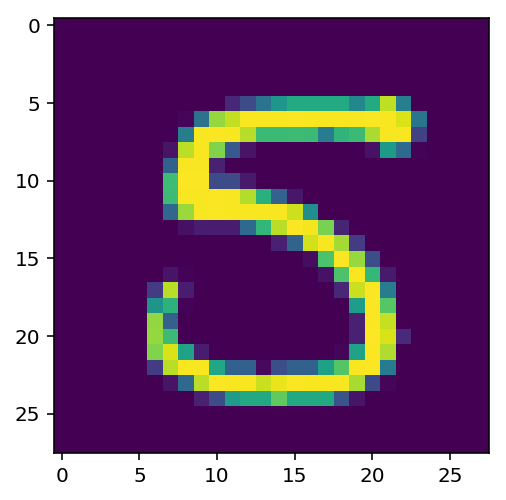

In [0]:
'''
성능 확인을 위해
Ctrl+Enter를 이용하여
반복 실행 해보자!
'''

id = rd.randrange(0,10000)

print('id = {}'.format(id))
print('다음 그림은 숫자 {} 입니다.'.format(test_y.argmax(axis=1)[id]))
print('모델의 예측 : {}'.format(single_pred_test[id]))
print('모델의 카테고리별 확률 : {}'.format(np.floor(logistic1_pred_test[id]*100)))
if test_y.argmax(axis=1)[id] == single_pred_test[id] :
    print('정답입니다')
else : 
    print('틀렸어요')
plt.imshow(test_x[id].reshape([28,-1]))
plt.show()